# Videogame Sales
This dataset contains games released from 1980 to present day and ranks them in terms of global sales. This data was scraped from vgchartz.com. Dataset variables are rank, name, platform, year, genre, publisher, North American sales, EU sales, Japan sales, sales from other regions, and Global sales.

Quick note: sales are being represented in millions.

The purpose of this notebook is to practice my python/pandas skills by asking some questions and looking for descriptive stats in the dataset.

## 1. Imports

In [1]:
# Analytics imports - pandas and numpy

import pandas as pd
from pandas import DataFrame
import numpy as np

# Plotting - matplotlib, seaborne

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = r'C:\Users\Will\Desktop\Datasets\Kaggle\videogamesales\vgsales.csv'

## 2. Load the dataset and get some basic stats

In [2]:
df = pd.read_csv(path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Just at a glance, you can see that this dataset has missing values for Year and Publisher columns -  would need to fill those
in and clean things up.

Let's get some basic quantitative stats to better understand the data variables:

In [4]:
print '--- BASIC STATS ---'

# Years covered?
print 'Dataset has games from %d' %df['Year'].min(),
print '- %d' %df['Year'].max()

# How many unique games?
print 'Number of Unique Games listed: ' + str(len(df['Name'].unique()))

# How many game publishers?
print 'Number of Publishers listed: ' + str(len(df['Publisher'].unique()))

# How many game platforms?
print 'Number of Platforms listed: ' + str(len(df['Platform'].unique()))

# How many game genres?
print 'Number of Genres listed: ' + str(len(df['Genre'].unique()))
print df['Genre'].unique()

--- BASIC STATS ---
Dataset has games from 1980 - 2020
Number of Unique Games listed: 11493
Number of Publishers listed: 579
Number of Platforms listed: 31
Number of Genres listed: 12
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [5]:
# Exactly how many NaN (missing) values?

print 'Amount of NaN values for each column:'
for column in df.columns:
    print column + ':' + str(len(df[df[column].isnull()]))

Amount of NaN values for each column:
Rank:0
Name:0
Platform:0
Year:271
Genre:0
Publisher:58
NA_Sales:0
EU_Sales:0
JP_Sales:0
Other_Sales:0
Global_Sales:0


## 3. Correlation between variables
To get an idea of how things relate with each other, let's do a basic test for correlation between the dataset variables.

In [6]:
correlation = df.corr()
correlation

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


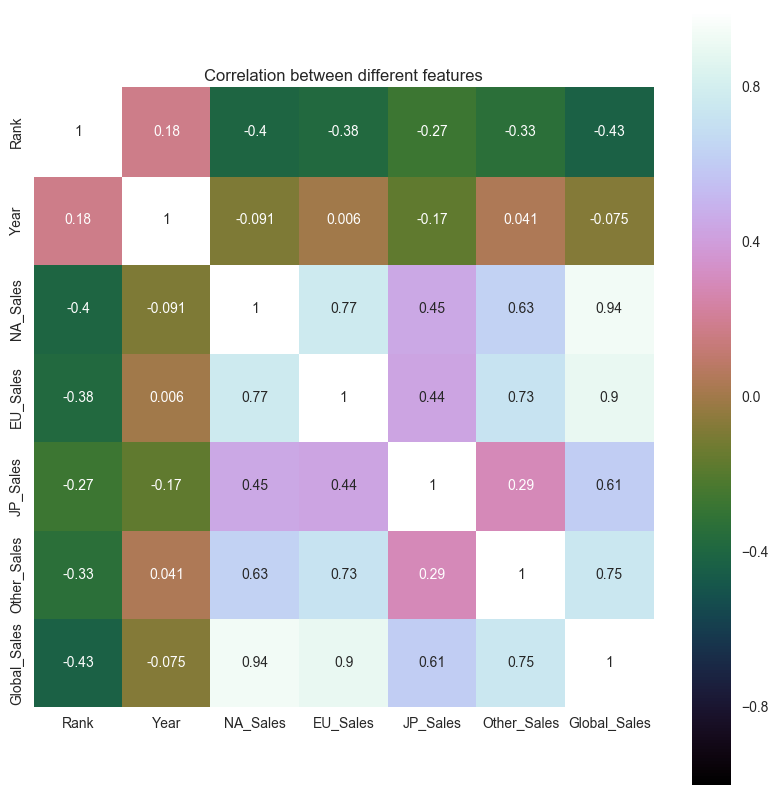

In [7]:
# Let's visualize the correlations with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')

### Some insights from the correlation

*There should be a direct correlation between rank and global sales, as the dataset is ranked by global sales. The lack of a correlation here doesn't make sense to me.

*There's extremely strong correlations between both North American and European sales and Global Sales - this indicates that
these markets compromise most of the sales for the majority of games in the dataset.

*JP has the lowest correlation with global sales (although its still strong), so after NA and EU collectively other regions comprise more sales than JP. This makes sense, given that other markets like South America and Australia import videogames.

## 4. Publisher Analysis

Lets take a look at the top publishers in the dataset. I'm interested in ranking the publishers on three different criteria:
top game sales globally, most games published, and highest average global sales per game.

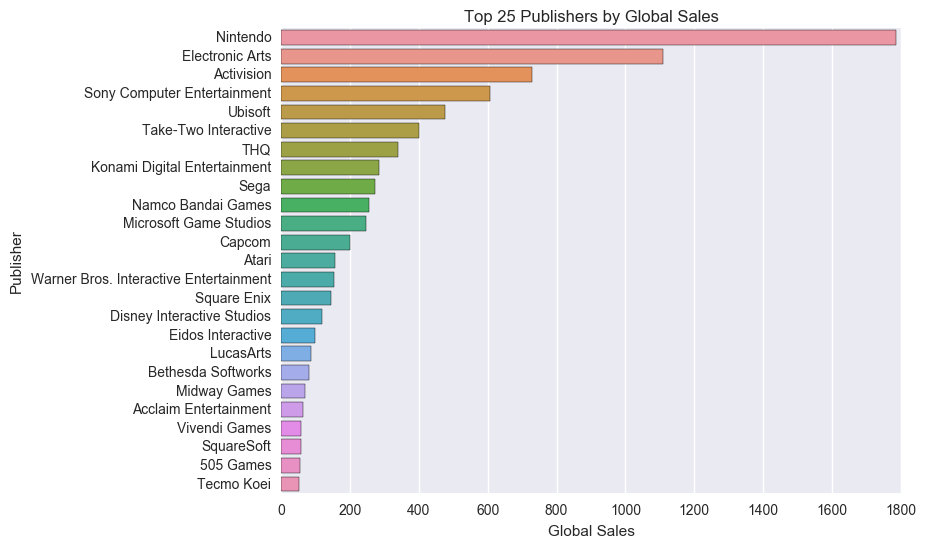

In [8]:
# Top 25 Publishers by Global Sales

publishers = df.groupby(['Publisher']).sum()
top25_publishers = publishers.sort_values(by='Global_Sales', ascending=False)[:25]
top25_publishers

plt.figure(figsize=(8,6))
sns.barplot(y=top25_publishers.index, x=top25_publishers.Global_Sales)
plt.ylabel("Publisher")
plt.xlabel("Global Sales")
plt.title('Top 25 Publishers by Global Sales')
plt.show()

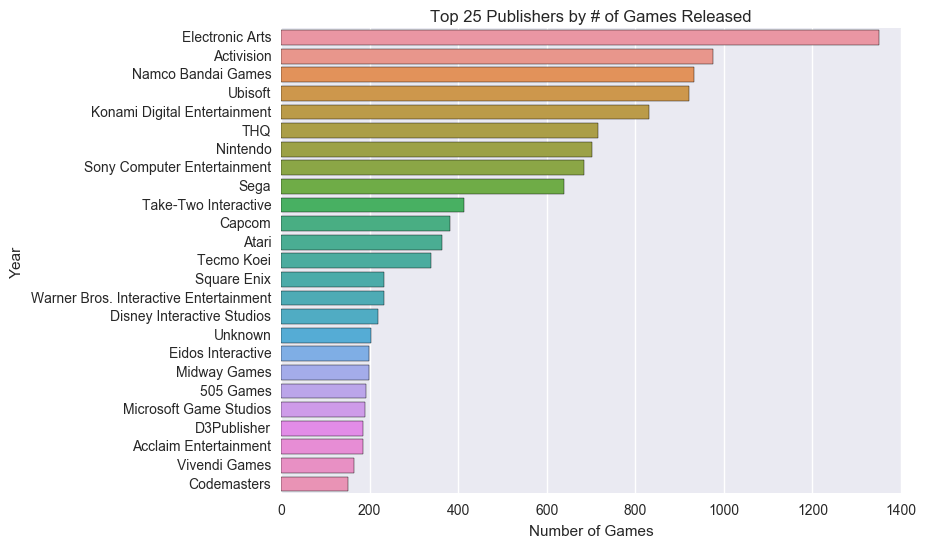

In [9]:
# Top 25 Publishers with most releases

mostgames_publisher = pd.crosstab(df.Publisher, df.Name)
mostgames_sum = mostgames_publisher.sum(axis=1)
top25_games = mostgames_sum.sort_values(ascending=False)[:25]
plt.figure(figsize=(8,6))
sns.barplot(y=top25_games.index, x=top25_games.values, orient="h")
plt.ylabel("Year")
plt.xlabel("Number of Games")
plt.title('Top 25 Publishers by # of Games Released')
plt.show()

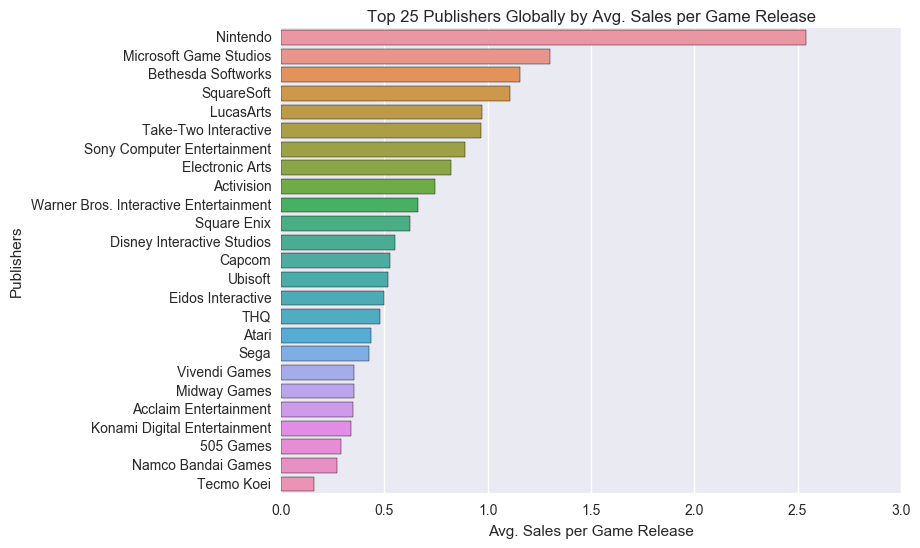

In [10]:
# Top 25 Publishers by Avg. Sales per Game Release
# Take the Top 25 Publishers by Global Sales and order them based on the average sales per game release

sales_per_game = (top25_publishers['Global_Sales']/mostgames_sum[top25_publishers.index]).sort_values(ascending=False)[:25]
sales_per_game
plt.figure(figsize=(8,6))
sns.barplot(y=sales_per_game.index, x=sales_per_game.values, orient="h")
plt.ylabel("Publishers")
plt.xlabel("Avg. Sales per Game Release")
plt.title('Top 25 Publishers Globally by Avg. Sales per Game Release')
plt.show()

In this dataset, it's apparent that Nintendo is the big winner. With the most global sales and highest global sales per release, it you can see that the company has a track record of putting out globally popular titles.

Conversely, publishers like EA and Activision seem to rely on sheer output for their success; being 2nd and 3rd place for global sales, and 1st and 2nd for titles put out respectively, these companies flood the market with annual game franchises. Being 8th and 9th place for global sales per release, it's clear that not all of EA and Activision's releases are hits like Nintendo titles.

## 5. Franchise Sales

I'm interested in determining the total global sales for some popular game franchises. To do this, I'll create a function that grabs all titles starting with the same starting words (ex. Uncharted, FIFA, Fire Emblem) and sums their global sales. Most game franchises use these trademarked naming conventions to maintain a consistent brand identity with customers.

In [11]:
def sum_globalsales(keyword):
    '''
    Finds the total amount of 
    Global Sales for a series of
    games with the same starting word/phrase
    '''
    total_sales = 0
    print "'" + keyword + "'" + ' Series'
    print '---TITLES---'
    for title in df['Name'].unique():   # list of unique game titles to avoid duplication below
        if title.startswith(keyword):
            group = df[df.Name == title]   # accounts for games released on multiple platforms
            for key in group.index:
                sales = df.iloc[key]['Global_Sales']
                print title + ': ' + str(sales) + ' [' + df.iloc[key]['Platform'] + ']'
                total_sales += sales
    print '-'*len('---TITLES---')
    return total_sales

Lets see what the global sales are for three of my most beloved franchises: **The Legend of Zelda**, **Gears of War**, and **Halo**. These examples lend themselves well to the function I've made, but the function could be better improved by searching based on a keyword appearing anywhere in the title (as opposed to the starting words). A use case for this would be searching for games with 'Mario' in the name; New Super Mario Bros, Super Mario 64, Mario and Luigi: Paper Jam, etc...

In [12]:
# The Legend of Zelda

sum_globalsales('The Legend of Zelda')

'The Legend of Zelda' Series
---TITLES---
The Legend of Zelda: Ocarina of Time: 7.6 [N64]
The Legend of Zelda: Ocarina of Time: 4.21 [3DS]
The Legend of Zelda: Twilight Princess: 7.31 [Wii]
The Legend of Zelda: Twilight Princess: 1.59 [GC]
The Legend of Zelda: 6.51 [NES]
The Legend of Zelda: Phantom Hourglass: 5.17 [DS]
The Legend of Zelda: A Link to the Past: 4.61 [SNES]
The Legend of Zelda: A Link to the Past: 2.7 [GBA]
The Legend of Zelda: The Wind Waker: 4.6 [GC]
The Legend of Zelda: The Wind Waker: 1.77 [WiiU]
The Legend of Zelda: Skyward Sword: 4.1 [Wii]
The Legend of Zelda: Link's Awakening: 3.83 [GB]
The Legend of Zelda: Spirit Tracks: 3.38 [DS]
The Legend of Zelda: Majora's Mask: 3.36 [N64]
The Legend of Zelda: A Link Between Worlds: 3.07 [3DS]
The Legend of Zelda: Majora's Mask 3D: 2.32 [3DS]
The Legend of Zelda: Link's Awakening DX: 2.22 [GB]
The Legend of Zelda: Oracle of Ages: 1.92 [GB]
The Legend of Zelda: Oracle of Seasons: 1.86 [GB]
The Legend of Zelda: The Minish Cap: 

76.670000000000002

In [13]:
# Gears of War

sum_globalsales('Gears of War')

'Gears of War' Series
---TITLES---
Gears of War 2: 6.76 [X360]
Gears of War 3: 6.24 [X360]
Gears of War: 6.11 [X360]
Gears of War: 0.02 [PC]
Gears of War: Ultimate Edition: 3.0 [XOne]
Gears of War: Judgment: 1.61 [X360]
------------


23.739999999999998

In [14]:
# Halo

sum_globalsales('Halo')

'Halo' Series
---TITLES---
Halo 3: 12.14 [X360]
Halo: Reach: 9.88 [X360]
Halo 4: 9.76 [X360]
Halo 2: 8.49 [XB]
Halo 2: 0.1 [PC]
Halo: Combat Evolved: 6.43 [XB]
Halo: Combat Evolved: 0.04 [PC]
Halo 3: ODST: 6.36 [X360]
Halo 5: Guardians: 4.26 [XOne]
Halo: The Master Chief Collection: 3.15 [XOne]
Halo Wars: 2.63 [X360]
Halo: Combat Evolved Anniversary: 2.44 [X360]
Halo 2 Multiplayer Map Pack: 0.69 [XB]
Halo Triple Pack: 0.16 [XB]
------------


66.530000000000001

## 6. Genre Analysis
Let's start by seeing what genres are most popular globally and in each specific region. 

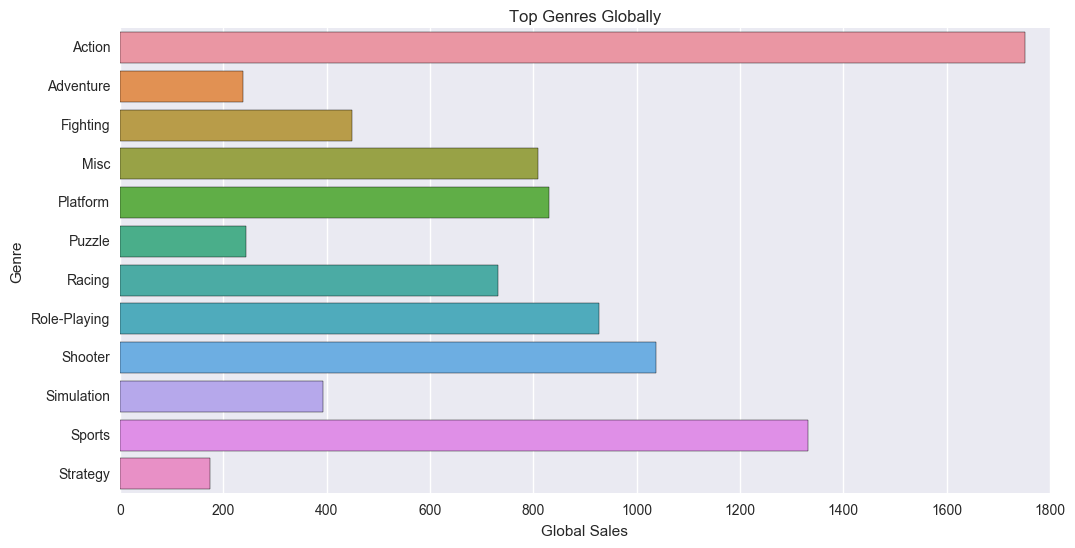

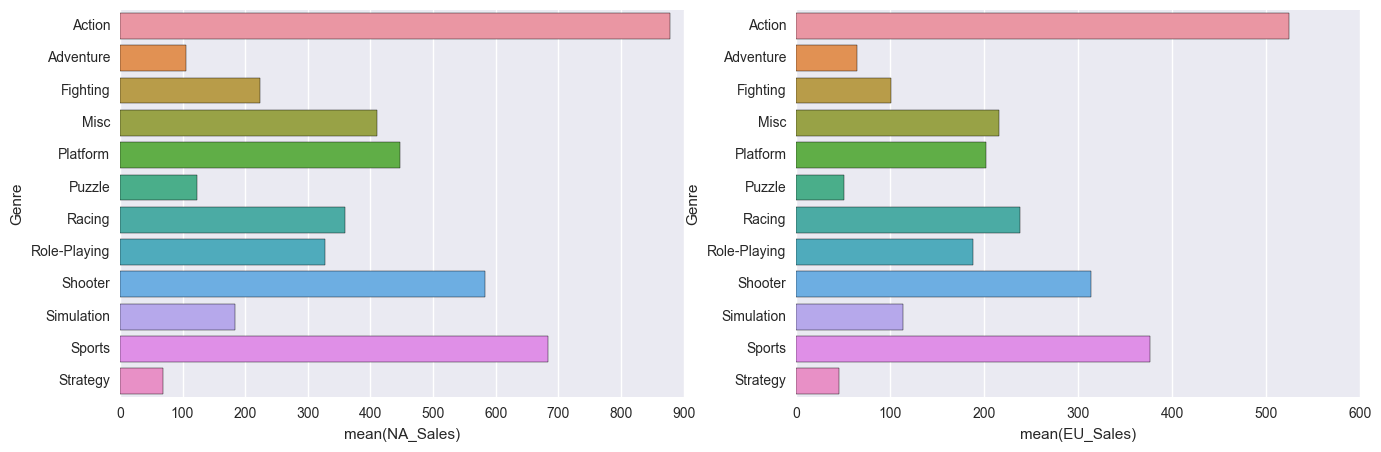

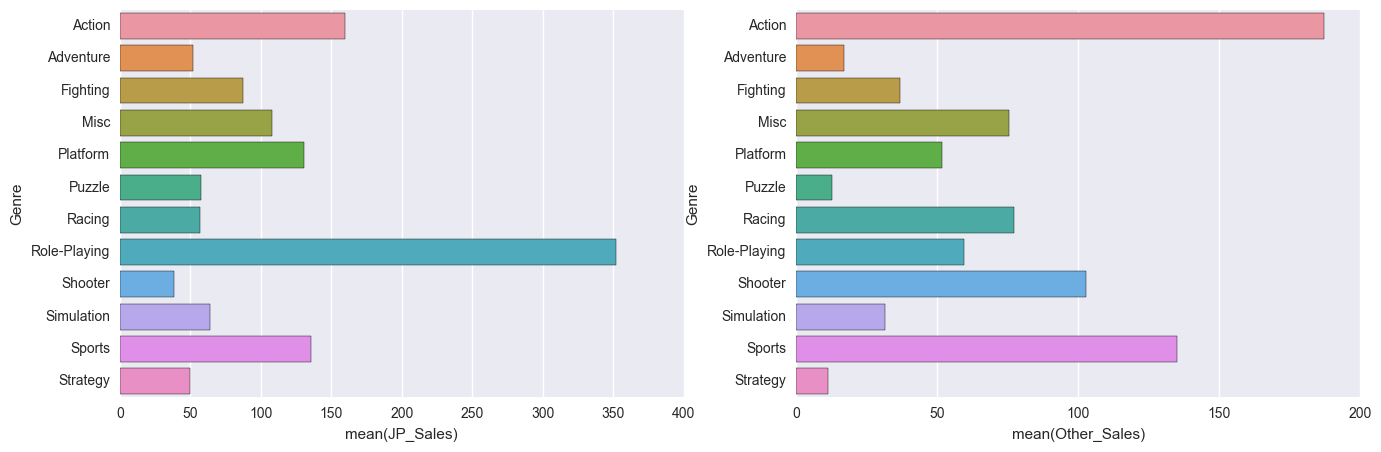

In [15]:
data = (df.groupby('Genre').sum())

# Top Genres Globally
plt.figure(figsize=(12,6))
sns.barplot(y=data.index, x=data.Global_Sales, orient="h")
plt.ylabel("Genre")
plt.xlabel("Global Sales")
plt.title('Top Genres Globally')

# Top Genres for NA, EU, JP, Other
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=data.index, x=data.NA_Sales, orient="h", ax=axis1)
sns.barplot(y=data.index, x=data.EU_Sales, orient="h", ax=axis2)

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=data.index, x=data.JP_Sales, orient="h", ax=axis1)
sns.barplot(y=data.index, x=data.Other_Sales, orient="h", ax=axis2)

Adventure is consistently one of the least popular genres across all regions, and it also seems like a vague genre to me. What's the difference between an adventure game and an action game? I would assume most adventures have some kind of action in them. Let's see the top 10 adventure games.

In [16]:
df[df.Genre == 'Adventure']['Name'].head(10)

50     Super Mario Land 2: 6 Golden Coins
158                      Assassin's Creed
218                      Assassin's Creed
251       Zelda II: The Adventure of Link
400            Rugrats: Search For Reptar
417                            L.A. Noire
434     Club Penguin: Elite Penguin Force
447                            Heavy Rain
521                                  Myst
549                            L.A. Noire
Name: Name, dtype: object

This doesn't really clear up the genre's description for me. Of course in all these game there's some sort of adventure going on, but if I had to gather a theme from the top titles it seems that perhaps they focus less on the player doing any fighting (Super Mario Land, Rugrats, Club Penguin, L.A. Noire). Then again, Assasin's Creed kind of throws a wrench in that idea.

Anyways, let's see which genres have the most games published.

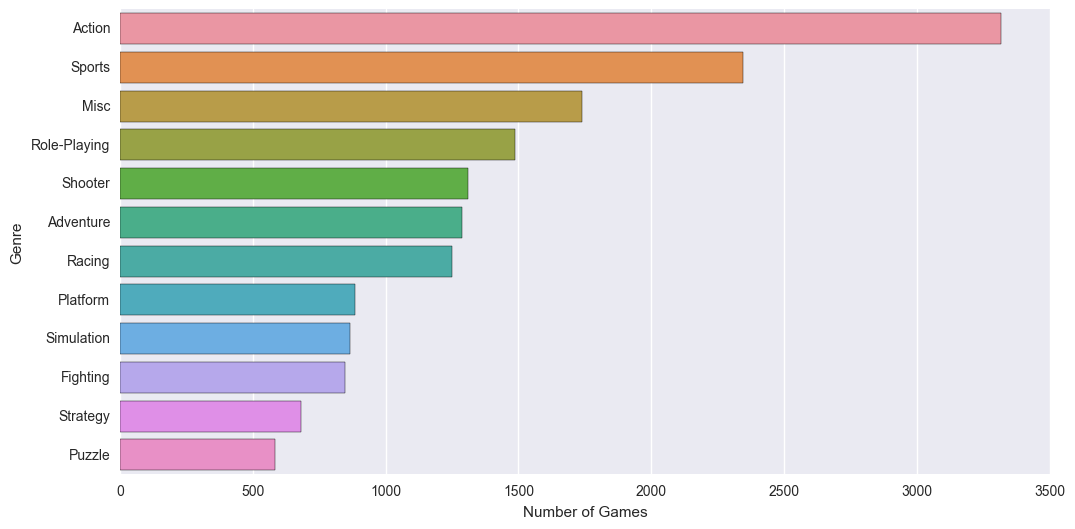

In [17]:
genreGame = pd.crosstab(df.Genre, df.Name)
genreGameSum = genreGame.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=genreGameSum.index, x=genreGameSum.values, orient="h")
plt.ylabel("Genre")
plt.xlabel("Number of Games")
plt.show()

Action and Sports seem to have the most published games; this makes sense to me as many of them are franchises (e.g. Grand Theft Auto, Legend of Zelda, FIFA, Madden).